# Resume Classification

Business objective:
The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention


# 1. Import Library

In [19]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [22]:
os.listdir("C:\\Users\\govin\\Downloads\\Resumes new")

['people soft', 'react', 'sql developer', 'work day']

# 2. Exctract the Text from Dataset

In [25]:
file_path1 = []
category1  = []
directory1 = "C:\\Users\\govin\\Downloads\\Resumes new\\people soft"
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

In [26]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
1,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft
2,PeopleSoft Database Administrator\n\n ...,PeopleSoft
3,Classification: Internal\n\nClassification: In...,PeopleSoft
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",PeopleSoft
5,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
6,PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS.K...,PeopleSoft
7,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
8,Vinod Akkala ...,PeopleSoft
9,PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...,PeopleSoft


In [27]:
file_path2 = []
category2  = []
directory2 = "C:\\Users\\govin\\Downloads\\Resumes new\\react"
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS Developer')

In [28]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer
1,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer
2,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer
4,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer
5,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer
6,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer
7,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer
8,Maryala Vinay Reddy\n\n\n\n\tProfessional Summ...,React JS Developer
9,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer


In [29]:
file_path3 = []
category3  = []
directory3 = "C:\\Users\\govin\\Downloads\\Resumes new\\sql developer"
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [30]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4, Hyderabad\n\n\nNazeer Basha\n\nSQL and Power...,SQL Developer
5,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
6,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
7,SQL SERVER DEVELOPER\n\n\n\n\n\nPriyanka L ...,SQL Developer
8,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
9,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer


In [31]:
file_path4 = []
category4  = []
directory4 = "C:\\Users\\govin\\Downloads\\Resumes new\\work day"
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [32]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday
2,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...,Workday
3,Harikrishna Akula ...,Workday
4,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...,Workday
5,G Himaja\n\n ...,Workday
6,Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSIONAL...,Workday
7,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday
8,Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE SUM...,Workday
9,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday


# 3. Create a DataFrame

In [33]:
resume_data = data1.append([data2, data3, data4], ignore_index = True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
1,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft,NaN,NaN,NaN
2,PeopleSoft Database Administrator\n\n ...,PeopleSoft,NaN,NaN,NaN
3,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",PeopleSoft,NaN,NaN,NaN
...,...,...,...,...,...
74,Workday Integration Consultant\n\n\n\nName ...,NaN,NaN,NaN,Workday
75,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Workday
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,Workday


In [34]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  79 non-null     object
 1   Category1    20 non-null     object
 2   Category2    24 non-null     object
 3   Category3    14 non-null     object
 4   Category4    21 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


# 3.1 Merge all Unnecessary column in One Column

In [35]:
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,G. Ananda Rayudu \n\n\t\t https://www.li...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,PeopleSoft Database Administrator\n\n ...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",PeopleSoft,NaN,NaN,NaN,PeopleSoft
...,...,...,...,...,...,...
74,Workday Integration Consultant\n\n\n\nName ...,NaN,NaN,NaN,Workday,Workday
75,Srikanth (WORKDAY hCM Consultant)\t ...,NaN,NaN,NaN,Workday,Workday
76,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Workday,Workday
77,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,NaN,NaN,NaN,Workday,Workday


In [36]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

In [38]:
#3.2 final data set
resume_data.head(15)

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,G. Ananda Rayudu \n\n\t\t https://www.li...
2,PeopleSoft,PeopleSoft Database Administrator\n\n ...
3,PeopleSoft,Classification: Internal\n\nClassification: In...
4,PeopleSoft,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \..."
5,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
6,PeopleSoft,PEOPLESOFT Administrator\n\n\n\n\n\nSRINIVAS.K...
7,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
8,PeopleSoft,Vinod Akkala ...
9,PeopleSoft,PeopleSoft Admin/PeopleSoft DBA\n\n\n\nGanesh ...


In [40]:
resume_data["Raw_Details"][1]

'G. Ananda Rayudu \n\n\t\t       https://www.linkedin.com/in/anandgudapati\t\n\n\n\n\n\nG. Ananda Rayudu \n\n\t\t       https://www.linkedin.com/in/anandgudapati\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\n\n\n\nProfile Summary:\t\t\t\t\t\t\t\t\t\t\n\n7+ years of experience in implementing, upgrading, and supporting PeopleSoft database administration including Human Capital Management (HCM), Financials, Campus Solutions and Portal IHUB\n\nExpertise in installation, configuration, setup, security and management of the PeopleSoft Internet Architecture PIA environment.\n\nIn-depth experience in analysis, planning, development, and implementation stages, including load testing, quality assurance, and tuning.\n\n\tGained extensive exposure in deploying PeopleSoft Environments.\n\n\tExperienced in Troubleshooting PeopleSoft Components.\n\nSkilled with the capability to analyse & interpret unique problems with a combination of training experience & logical thinking to find the right solutions\n\n\n\nCor

In [42]:
#3.3 Save new CSV File
resume_data.to_csv('Raw_Resume.csv', index=False)

In [43]:
#"C:\\Users\\govin\\NLP project\\Raw_Resume.csv"

# 4. Data Understanding

In [62]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,G. Ananda Rayudu \n\n\t\t https://www.li...
2,PeopleSoft,PeopleSoft Database Administrator\n\n ...
3,PeopleSoft,Classification: Internal\n\nClassification: In...
4,PeopleSoft,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \..."
...,...,...
74,Workday,Workday Integration Consultant\n\n\n\nName ...
75,Workday,Srikanth (WORKDAY hCM Consultant)\t ...
76,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
77,Workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...


In [63]:
resume_data[resume_data.Category == 'Workday']

,Category,Raw_Details
58,Workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
59,Workday,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...
60,Workday,Hari Krishna M\n\n\n\n\n\nSummary:\n\nA result...
61,Workday,Harikrishna Akula ...
62,Workday,HIMA.MENDU\n\n\t \n\n\n\nCareer Objective\n\n...
63,Workday,G Himaja\n\n ...
64,Workday,Name:\tJ. Sumanth Royal.\n\n\t\n\nPROFESSIONAL...
65,Workday,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
66,Workday,Madeeswar A\n\n\t\n\n\t\t\n\n\t\t\tPROFILE SUM...
67,Workday,Mooraboyina Guravaiah\n\nWorkday Integration S...


In [64]:
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

In [65]:
#4.1 Number of Words in each Resume
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023
1,G. Ananda Rayudu \n\n\t\t https://www.li...,1451
2,PeopleSoft Database Administrator\n\n ...,1346
3,Classification: Internal\n\nClassification: In...,558
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",667


In [66]:
#4.2 Number of Characters
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,8010
1,G. Ananda Rayudu \n\n\t\t https://www.li...,8394
2,PeopleSoft Database Administrator\n\n ...,6900
3,Classification: Internal\n\nClassification: In...,4917
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",5196


In [67]:
#4.3 Number of Stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

,Raw_Details,Stopwords
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
1,G. Ananda Rayudu \n\n\t\t https://www.li...,186
2,PeopleSoft Database Administrator\n\n ...,177
3,Classification: Internal\n\nClassification: In...,114
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",123


In [68]:
#4.4 Number of Numerics
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,4
1,G. Ananda Rayudu \n\n\t\t https://www.li...,6
2,PeopleSoft Database Administrator\n\n ...,4
3,Classification: Internal\n\nClassification: In...,7
4,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",7


In [69]:
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
1,PeopleSoft,G. Ananda Rayudu \n\n\t\t https://www.li...,1451,8394,186,6
2,PeopleSoft,PeopleSoft Database Administrator\n\n ...,1346,6900,177,4
3,PeopleSoft,Classification: Internal\n\nClassification: In...,558,4917,114,7
4,PeopleSoft,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",667,5196,123,7
...,...,...,...,...,...,...
74,Workday,Workday Integration Consultant\n\n\n\nName ...,904,7030,197,3
75,Workday,Srikanth (WORKDAY hCM Consultant)\t ...,1063,6737,194,9
76,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,1076,8329,236,6
77,Workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,1035,6933,193,7


# 5. Text Pre-Processing

# 5.1 Using Regular Expression

In [70]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [78]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

In [79]:
#5.2 Clean Text from Resume
resume_data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,G. Ananda Rayudu \n\n\t\t https://www.li...,ananda rayudu ananda rayudu profile summary ye...
2,PeopleSoft,PeopleSoft Database Administrator\n\n ...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
4,PeopleSoft,"Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...",priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...,...
74,Workday,Workday Integration Consultant\n\n\n\nName ...,workday integration consultant name sri krishn...
75,Workday,Srikanth (WORKDAY hCM Consultant)\t ...,srikanth workday hcm consultant seeking suitab...
76,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday hcm fcm name kumar role workday consul...
77,Workday,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,venkateswarlu workday consultant professional ...


In [80]:
#5.3 Save the Clean Data in new CSV File

In [81]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,ananda rayudu ananda rayudu profile summary ye...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,srikanth workday hcm consultant seeking suitab...
76,Workday,workday hcm fcm name kumar role workday consul...
77,Workday,venkateswarlu workday consultant professional ...


In [82]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [83]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,ananda rayudu ananda rayudu profile summary ye...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,srikanth workday hcm consultant seeking suitab...
76,Workday,workday hcm fcm name kumar role workday consul...
77,Workday,venkateswarlu workday consultant professional ...


In [85]:
resume_data.Resume_Details[4]

'priyanka ramadoss mountpleasant coonoor nilgiris career objective excel software professional working learning challenging environment utilize skills knowledge diligence dedication ensure maximum contribution growth organization work profile summary adept professional years september present experience peoplesoft admin accenture professional summary peoplesoft administrator september present experience peoplesoft administration finance application proficient creating configuring peoplesoft components like web server application server process schedulers active monitoring non production databases applications knowledgeable peoplesoft migrations using application designer data mover taking compare reports also moving codes dev test production environments usage ppm tool well perform peoplesoft migrations compare report generation full life cycle installation peoplesoft environments pre post database refresh activities change package creation applying bug fixes using change assistant peo

# 6. Named Entity Recognition (NER)

In [86]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 600), ('peoplesoft', 453), ('workday', 432), ('application', 418), ('using', 395), ('server', 360), ('data', 332), ('project', 327), ('reports', 326), ('sql', 281), ('business', 273), ('web', 251), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 173), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('technical', 164), ('working', 162), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('responsibilities', 147), ('various', 146), ('oracle', 142), ('role', 142), ('developer', 141), ('environment', 139), ('management', 136), ('security', 134), ('eib', 134), ('production', 133)]


# 7. Parts Of Speech (POS) Tagging

In [106]:
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [107]:
for token in doc_block[:30]:
    print(token,token.pos_)  

d PROPN
pum PROPN
peoplesoft PROPN
update NOUN
manager NOUN
installation NOUN
dpk PROPN
working VERB
knowledge NOUN
ansible ADJ
docker NOUN
developing VERB
new ADJ
shell NOUN
scripts NOUN
troubleshooting VERB
shell NOUN
script NOUN
failures NOUN
techmahindra PROPN
role PROPN
project NOUN
application NOUN
support NOUN
automation NOUN
devops NOUN
tools NOUN
peoplesoft VERB
admin NOUN
skills NOUN


# 7.1 Filtering out only the Nouns and Verbs from the Text to Tokens

In [109]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'rdbms', 'work', 'environment', 'challenging', 'assignments', 'yield', 'benefits', 'job', 'satisfaction', 'paced', 'growth', 'experience', 'role', 'system', 'admin', 'skills', 'shell', 'managing', 'production', 'environments', 'support', 'environments', 'installed', 'involved', 'day', 'day', 'activities', 'project', 'migration', 'database', 'refresh', 'system', 'admin', 'changes', 'tax', 'updates', 'troubleshooting', 'servers', 'application', 'servers', 'web', 'servers', 'process', 'scheduler', 'servers', 'applying', 'patches', 'applications', 'working', 'shell', 'scripting', 'used', 'integration', 'method', 'exchange', 'files', 'systems', 'installation', 'troubleshooting', 'tier', 'setup', 'requirement', 'reviewing', 'vulne

# 7.2 Counting all the Nouns and Verbs present in the Tokens of words

In [110]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,546
1,application,417
2,using,384
3,workday,353
4,reports,326
5,data,307
6,project,290
7,business,260
8,server,243
9,web,238


# 7.3 Visualizing the Result of Top 20 Nouns and Verbs most Frequently

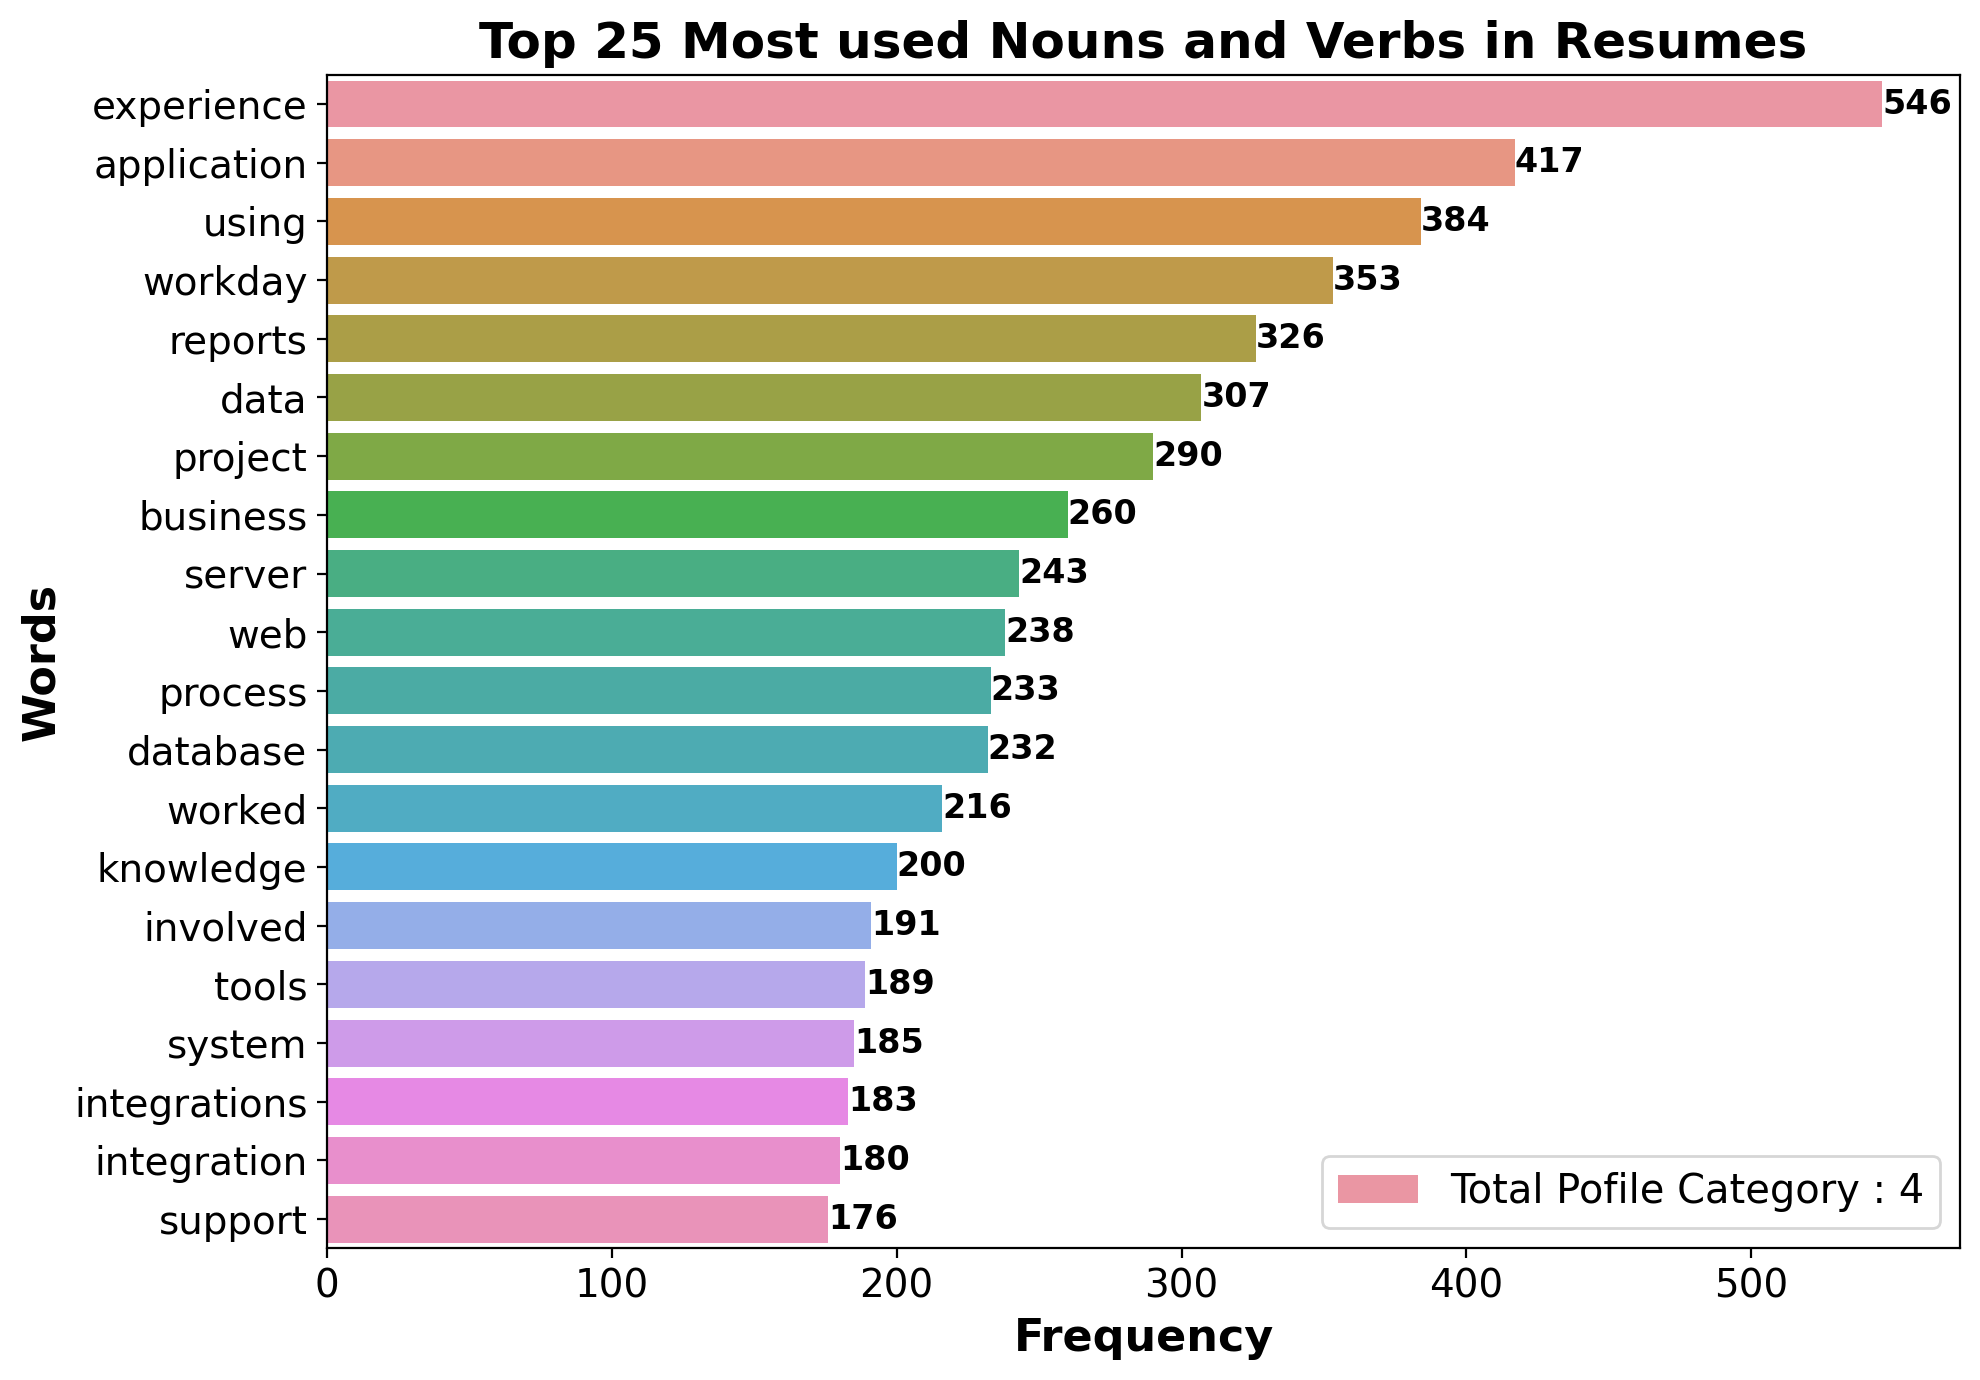

In [115]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('C:\\Users\\govin\\NLP project/Top_Nouns_Verbs_Bar', dpi = 500)

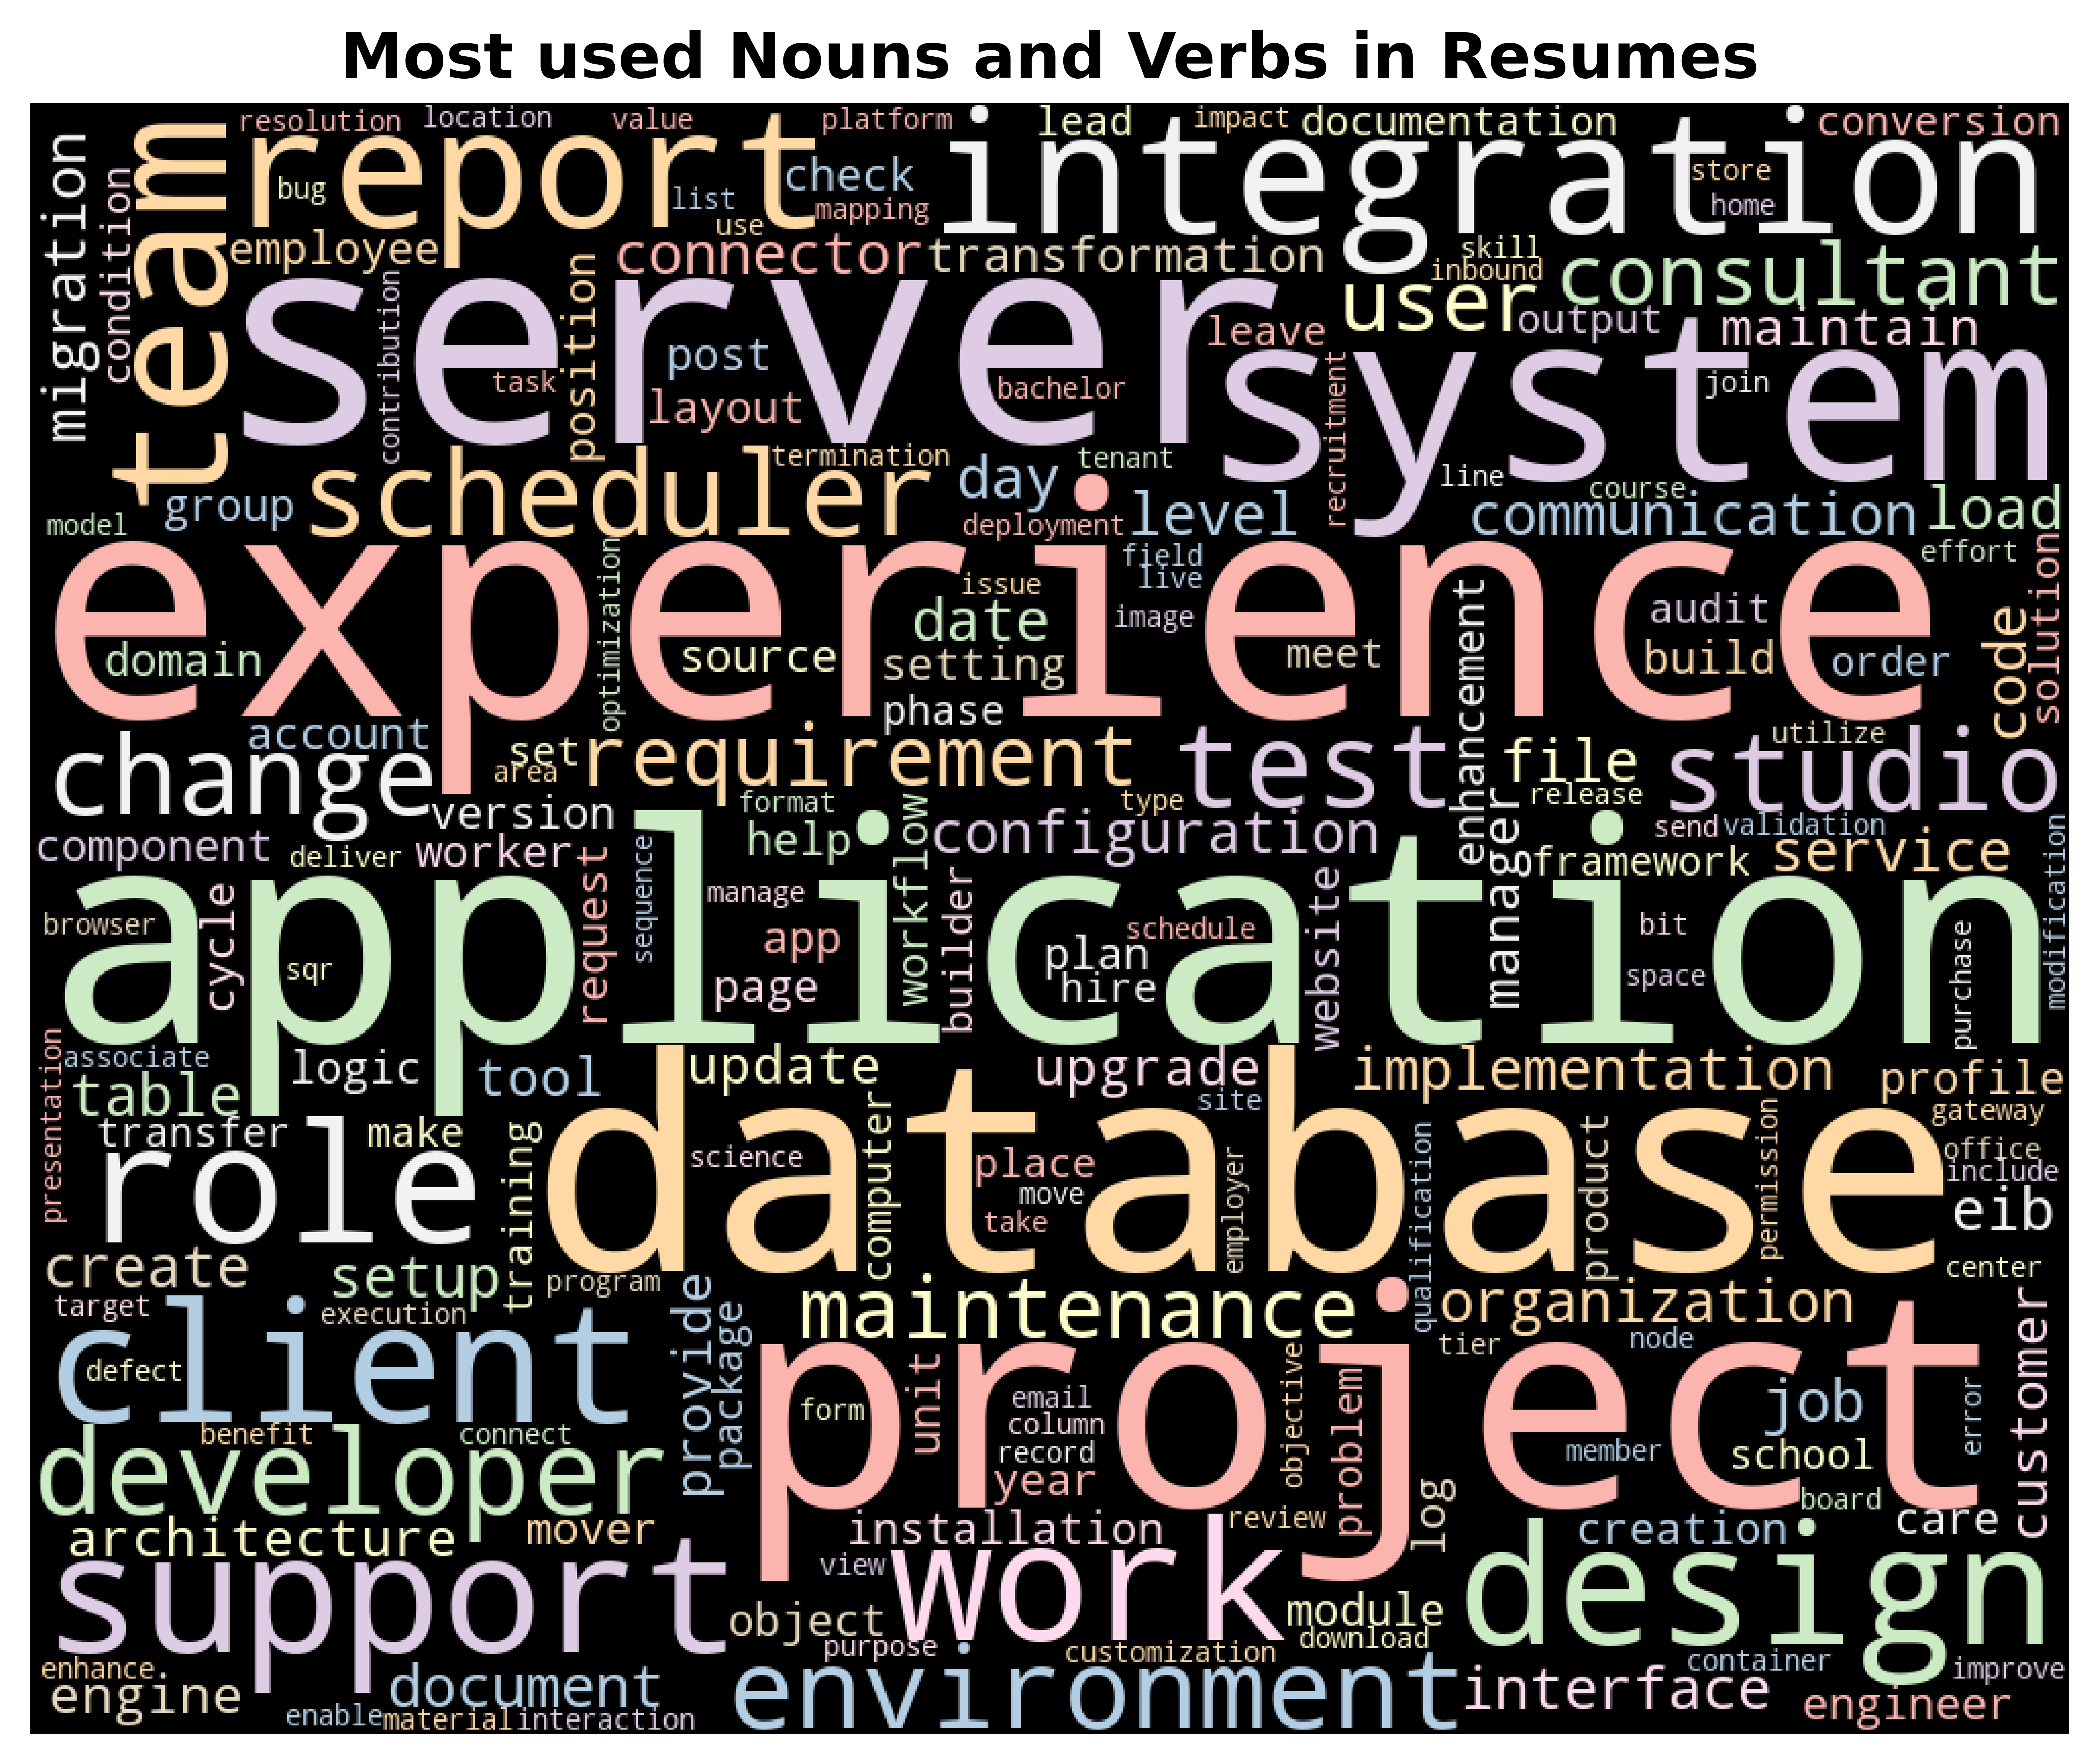

In [116]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file('C:\\Users\\govin\\NLP project/Word_Clowds_Noun_Verb.png')
plt.show()

In [117]:
os.getcwd() #to get the current working directory.

'C:\\Users\\govin\\NLP project'

# THE END !